/tmp/ipykernel_3817/1981154107.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


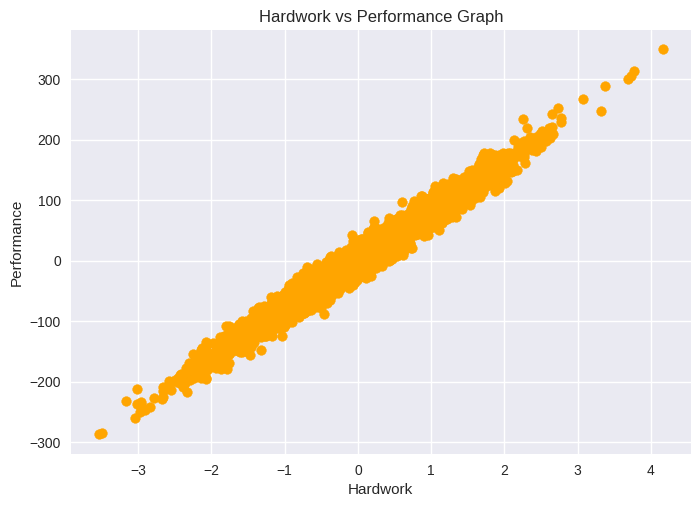

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


############Section 1: Load and visualize the data
# Load
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
y = pd.read_csv('./Training Data/Linear_Y_Train.csv')

# Convert X,Y to Numpy arrays
X = X.values
y = y.values

# Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std


# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()


In [7]:
#Section2 -Linear Regression
'''
0o=0o-n*1/m(sigma(y^(i)-y^(i)))
01=01-n*1/m(sigma(y^(i)-y^(i)))x^(i)




'''

def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

theta,error_list,theta_list = gradientDescent(X,y)




    









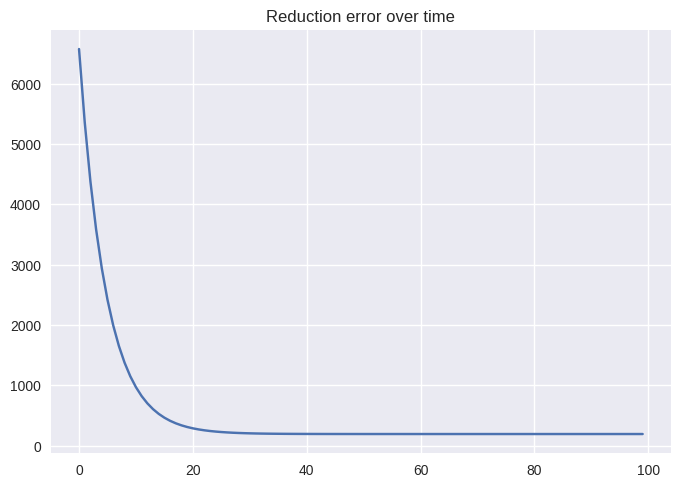

In [8]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

In [14]:
### Section - 3 Predictions and Best Line

In [16]:
y_=hypothesis(X,theta)


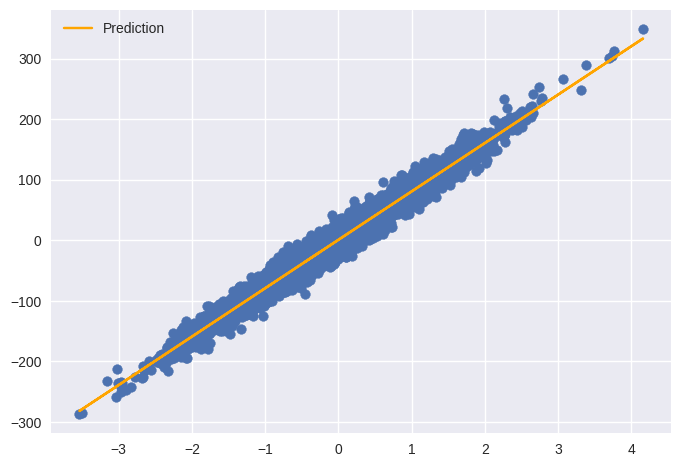

In [17]:
#Training  + Prediction
plt.scatter(X,y)
plt.plot(X,y_,color="orange",label="Prediction")
plt.legend()
plt.show()


In [ ]:
X_test=pd.read_csv("./Test Cases/Linear_X_Test.csv").values
y_test=hypothesis(X_test,theta)

df=pd.DataFrame(data=y_test,columns=["y"])

df.to_csv("y_prediction.csv",index=False)


In [ ]:
##4Computing score
#Score:R2(R-Squared) or Coefficient of Determination

def r2_score(Y,Y_):
    #Instead of Loop np.sum is recommended as it is fast
    
    num=np.sum((Y-Y_)**2)
    denom=np.sum((Y-Y.mean())**2)

    score=(1-num/denom)
    return score*100

r2_score(y,y_)